In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx


In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel('../input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx')

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [7]:
df.shape

(7043, 33)

In [8]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [9]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

Some column names have some whitespaces infront of them, Its to better to have an underscore instead


In [10]:
df.columns = df.columns.str.replace(' ','_')

In [11]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value',
       'Churn_Score', 'CLTV', 'Churn_Reason'],
      dtype='object')

In [12]:
#checking for missing values
df[df.isnull().any(axis=1)]

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,One year,No,Mailed check,56.95,1889.5,No,0,61,3441,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,43,4459,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,Month-to-month,No,Mailed check,29.75,301.9,No,0,51,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [13]:

df[df.isnull().any(axis=1)]

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,One year,No,Mailed check,56.95,1889.5,No,0,61,3441,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,43,4459,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,Month-to-month,No,Mailed check,29.75,301.9,No,0,51,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [14]:
df1 = df

In [15]:
df1= df1[df1.Tenure_Months != 0]

It seems that churn reason hasn't yet been updated for some rows, hence that column (Churn reason) is of no use to us. The Country, State and Count column all have the same values. They can be removed too.CustomerID is also of no use when it comes to predicting the churn value, so that can be removed as well.
lat_long is also a redundant column which is of no use.

1. Churn_value
2. Country
3. State
4. Count
5. CustomerID
6. Churn Reason
7. lat_long

In [16]:
df1.drop(['Country','State','Count','CustomerID','Churn_Reason','Lat_Long'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Churn Score and CLTV are metrics that are cal

In [17]:
df1.drop(['Churn_Score','CLTV','Churn_Label'],axis=1,inplace=True)

In [18]:
df1.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


It looks like some column values have whitespaces in between them and have to be dealt with


In [19]:
df1['Payment_Method'].replace(' ','_',regex=True,inplace=True)
df1['City'].replace(' ','_',regex=True,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
df1.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.3,1


In [21]:
df1.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

It can be seen from above that the Total_Charges variable has datatype object but has numbers in it. This can be changed to float 

In [22]:
df1.Total_Charges = pd.to_numeric(df1.Total_Charges,errors = 'coerce')

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
df1.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [24]:
df1.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


Handling high categorical features Frequency encoding can be done to replace those variables which have high cardinality

In [25]:
len(df1.City.unique())

1129

In [26]:
#splitting numerical and categorical variables
x_dict = dict(df1.dtypes)
x_cat = [i for i in x_dict.keys() if x_dict[i] == 'O']
x_num = [i for i in x_dict.keys() if x_dict[i] != 'O']

In [27]:
df1_cat = df1[x_cat]
df1_num = df1[x_num]

In [28]:
df1_num.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Churn_Value
0,90003,33.964131,-118.272783,2,53.85,108.15,1
1,90005,34.059281,-118.307420,2,70.70,151.65,1
2,90006,34.048013,-118.293953,8,99.65,820.50,1
3,90010,34.062125,-118.315709,28,104.80,3046.05,1
4,90015,34.039224,-118.266293,49,103.70,5036.30,1


In [29]:
df1_cat.head()

,City,Gender,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method
0,Los_Angeles,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check
1,Los_Angeles,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check
2,Los_Angeles,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check
3,Los_Angeles,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check
4,Los_Angeles,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic)


In [30]:
mydict = dict(df1_cat.City.value_counts())
df1_cat.City = df1_cat.City.map(mydict)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
df1_cat.head()

,City,Gender,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method
0,304,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check
1,304,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check
2,304,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check
3,304,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check
4,304,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic)


In [32]:
dumcols = df1_cat.loc[:, df1_cat.columns != 'City']
collist = dumcols.columns

In [33]:
df1_cat_proc = pd.get_dummies(df1_cat,columns = collist )

In [34]:
df1_cat_proc

,City,Gender_Female,Gender_Male,Senior_Citizen_No,Senior_Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone_Service_No,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,304,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,304,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,304,1,0,1,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
3,304,1,0,1,0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,304,0,1,1,0,1,0,0,1,0,...,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5,1,0,1,0,1,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
7039,5,0,1,1,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7040,5,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7041,5,1,0,1,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0


In [35]:
df1_num.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Churn_Value
0,90003,33.964131,-118.272783,2,53.85,108.15,1
1,90005,34.059281,-118.307420,2,70.70,151.65,1
2,90006,34.048013,-118.293953,8,99.65,820.50,1
3,90010,34.062125,-118.315709,28,104.80,3046.05,1
4,90015,34.039224,-118.266293,49,103.70,5036.30,1


In [36]:
df1_cat_proc.head()

,City,Gender_Female,Gender_Male,Senior_Citizen_No,Senior_Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone_Service_No,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,304,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,304,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,304,1,0,1,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
3,304,1,0,1,0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,304,0,1,1,0,1,0,0,1,0,...,1,1,0,0,0,1,1,0,0,0


In [37]:
df1_proc = pd.concat([df1_cat_proc,df1_num],axis=1)

In [38]:
df1_proc

,City,Gender_Female,Gender_Male,Senior_Citizen_No,Senior_Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone_Service_No,...,Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Churn_Value
0,304,0,1,1,0,1,0,1,0,0,...,0,0,1,90003,33.964131,-118.272783,2,53.85,108.15,1
1,304,1,0,1,0,1,0,0,1,0,...,0,1,0,90005,34.059281,-118.307420,2,70.70,151.65,1
2,304,1,0,1,0,1,0,0,1,0,...,0,1,0,90006,34.048013,-118.293953,8,99.65,820.50,1
3,304,1,0,1,0,0,1,0,1,0,...,0,1,0,90010,34.062125,-118.315709,28,104.80,3046.05,1
4,304,0,1,1,0,1,0,0,1,0,...,0,0,0,90015,34.039224,-118.266293,49,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5,1,0,1,0,1,0,1,0,0,...,0,0,0,92285,34.341737,-116.539416,72,21.15,1419.40,0
7039,5,0,1,1,0,0,1,0,1,0,...,0,0,1,92301,34.667815,-117.536183,24,84.80,1990.50,0
7040,5,1,0,1,0,0,1,0,1,0,...,1,0,0,92304,34.559882,-115.637164,72,103.20,7362.90,0
7041,5,1,0,1,0,0,1,0,1,1,...,0,1,0,92305,34.167800,-116.864330,11,29.60,346.45,0


In [39]:
#splitting into x and y
y = df1_proc.Churn_Value


In [40]:
x = df1_proc.loc[:, df1_proc.columns != 'Churn_Value']

In [41]:
y = df1_proc['Churn_Value']

In [42]:
#splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,stratify=y)

In [43]:
#applying XGBOOST

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic',missing=1,seed=42)

clf_xgb.fit(x_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set = [(x_test,y_test)])

[0]	validation_0-aucpr:0.62510
[1]	validation_0-aucpr:0.64199
[2]	validation_0-aucpr:0.65327
[3]	validation_0-aucpr:0.65209
[4]	validation_0-aucpr:0.65726
[5]	validation_0-aucpr:0.66331
[6]	validation_0-aucpr:0.66744
[7]	validation_0-aucpr:0.66933
[8]	validation_0-aucpr:0.66238
[9]	validation_0-aucpr:0.65752


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[10]	validation_0-aucpr:0.65392
[11]	validation_0-aucpr:0.65240
[12]	validation_0-aucpr:0.65009
[13]	validation_0-aucpr:0.64961
[14]	validation_0-aucpr:0.64930
[15]	validation_0-aucpr:0.64909
[16]	validation_0-aucpr:0.64868


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=1, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


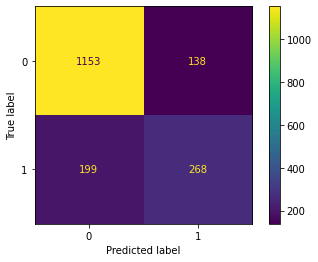

In [44]:
plot_confusion_matrix(clf_xgb,x_test,y_test,values_format = 'd')

In [45]:
#using SMOTE to oversample the minority classes

sm = SMOTE(random_state=42)

x,y = sm.fit_resample(x_train,y_train)

In [46]:
#splitting data after applying SMOTE
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,stratify=y)

In [47]:
#Applying XGboost 

clf_xgb1 = xgb.XGBClassifier(objective = 'binary:logistic',missing=1,seed=42)

clf_xgb1.fit(x_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set = [(x_test,y_test)])

[0]	validation_0-aucpr:0.89486
[1]	validation_0-aucpr:0.92415
[2]	validation_0-aucpr:0.93614
[3]	validation_0-aucpr:0.94371
[4]	validation_0-aucpr:0.94497
[5]	validation_0-aucpr:0.94897
[6]	validation_0-aucpr:0.95289
[7]	validation_0-aucpr:0.95448
[8]	validation_0-aucpr:0.95495
[9]	validation_0-aucpr:0.95553


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[10]	validation_0-aucpr:0.95630
[11]	validation_0-aucpr:0.95629
[12]	validation_0-aucpr:0.95704
[13]	validation_0-aucpr:0.95742
[14]	validation_0-aucpr:0.95802
[15]	validation_0-aucpr:0.95770
[16]	validation_0-aucpr:0.95815
[17]	validation_0-aucpr:0.95772
[18]	validation_0-aucpr:0.95812
[19]	validation_0-aucpr:0.95840
[20]	validation_0-aucpr:0.95813
[21]	validation_0-aucpr:0.95825
[22]	validation_0-aucpr:0.95820
[23]	validation_0-aucpr:0.95823
[24]	validation_0-aucpr:0.95824
[25]	validation_0-aucpr:0.95850
[26]	validation_0-aucpr:0.95842
[27]	validation_0-aucpr:0.95819
[28]	validation_0-aucpr:0.95797
[29]	validation_0-aucpr:0.95779
[30]	validation_0-aucpr:0.95763
[31]	validation_0-aucpr:0.95742
[32]	validation_0-aucpr:0.95742
[33]	validation_0-aucpr:0.95710
[34]	validation_0-aucpr:0.95665
[35]	validation_0-aucpr:0.95661


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=1, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


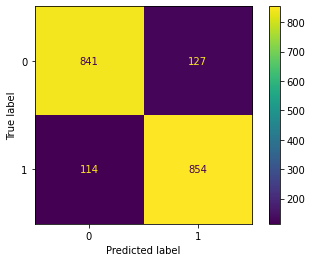

In [48]:
plot_confusion_matrix(clf_xgb1,x_test,y_test,values_format = 'd')